# Assignment 3 - Kernels and SVMs

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

## 1

Let $\mathrm{x}=\left\{ x_{1},\dots,x_{n}\right\}$  be a subset of an input dataset X. Considering the kernel function $k:\mathrm{X}\times\mathrm{X}\rightarrow\mathbb{R}$ which induces a feature space $\phi\left(\mathrm{X}\right)$. 

### a. Apply the kernel trick to the expression "center of mass of the data points in the feature space"

<!-- Note: I first wrote this in LyX and copy&paste all, it's easier that way -->

The equation to calculate the average distance in the feature space for a dataset is:

$$\begin{align}
\frac{1}{n}\sum_{i=1}^{n}\left\Vert \phi\left(x_{i}\right)-\phi_{S}\left(\mathrm{x}\right)\right\Vert _{\phi\left(\mathrm{X}\right)}&=\frac{1}{n}\sum_{i=1}^{n}\left\Vert \phi\left(x_{i}\right)-\frac{1}{n}\sum_{j=1}^{n}\phi\left(x_{j}\right)\right\Vert _{\phi\left(\mathrm{X}\right)}&\textrm{by definition of }\phi_{S}\\&=\frac{1}{n^{2}}\sum_{i=1}^{n}\left\Vert n\phi\left(x_{i}\right)-\sum_{j=1}^{n}\phi\left(x_{j}\right)\right\Vert _{\phi\left(\mathrm{X}\right)}&\\&=\frac{1}{n^{2}}\sum_{i=1}^{n}\left\Vert \sum_{j=1}^{n}\phi\left(x_{i}\right)-\phi\left(x_{j}\right)\right\Vert _{\phi\left(\mathrm{X}\right)}&\\&=\frac{1}{n^{2}}\sum_{i=1}^{n}\sqrt{\left\langle \sum_{j=1}^{n}\phi\left(x_{i}\right)-\phi\left(x_{j}\right),\sum_{j=1}^{n}\phi\left(x_{i}\right)-\phi\left(x_{j}\right)\right\rangle }&\textrm{because }\left\langle x,x\right\rangle =\left\Vert x\right\Vert ^{2}
\end{align}$$

Let's define $y_{j}=\phi\left(x_{i}\right)-\phi\left(x_{j}\right)$ to simplify a little the calculations.

$$\frac{1}{n}\sum_{i=1}^{n}\left\Vert \phi\left(x_{i}\right)-\phi_{S}\left(\mathrm{x}\right)\right\Vert _{\phi\left(\mathrm{X}\right)}=\frac{1}{n^{2}}\sum_{i=1}^{n}\sqrt{\left\langle \sum_{j=1}^{n}y_{j},\sum_{j=1}^{n}y_{j}\right\rangle }$$

Because the dot product is conmutative over addition, we could think of $\left\langle \sum_{j=1}^{n}y_{j},\sum_{j=1}^{n}y_{j}\right\rangle$ as if we were trying to square an addition, something like $\left(\sum_{j=1}^{n}y_{j}\right)^{2}$ (where $y_{j}$ behaves as a regular variable), and that is actually quite neat. It's interesting to note that $\left(\sum_{j=1}^{n}y_{j}\right)^{2}$ reduces to $\sum_{j=1}^{n}\sum_{k=1}^{n}y_{j}y_{k}$ or in dot product notation $\sum_{j=1}^{n}\sum_{k=1}^{n}\left\langle y_{j},y_{k}\right\rangle$.

$$\begin{align}
\frac{1}{n}\sum_{i=1}^{n}\left\Vert \phi\left(x_{i}\right)-\phi_{S}\left(\mathrm{x}\right)\right\Vert _{\phi\left(\mathrm{X}\right)}&=\frac{1}{n^{2}}\sum_{i=1}^{n}\sqrt{\sum_{j=1}^{n}\sum_{k=1}^{n}\left\langle y_{j},y_{k}\right\rangle }\\&=\frac{1}{n^{2}}\sum_{i=1}^{n}\sqrt{\sum_{j=1}^{n}\sum_{k=1}^{n}\left\langle \phi\left(x_{i}\right)-\phi\left(x_{j}\right),\phi\left(x_{i}\right)-\phi\left(x_{k}\right)\right\rangle }\\&=\frac{1}{n^{2}}\sum_{i=1}^{n}\sqrt{\sum_{j=1}^{n}\sum_{k=1}^{n}\left\langle \phi\left(x_{i}\right),\phi\left(x_{i}\right)\right\rangle +\left\langle \phi\left(x_{j}\right),\phi\left(x_{k}\right)\right\rangle -\left\langle \phi\left(x_{i}\right),\phi\left(x_{j}\right)\right\rangle -\left\langle \phi\left(x_{i}\right),\phi\left(x_{k}\right)\right\rangle }
\end{align}
$$

Now that we were able to write the expression as a combination of simple dot product multiplications, we can apply the kernel trick!

$$\frac{1}{n}\sum_{i=1}^{n}\left\Vert \phi\left(x_{i}\right)-\phi_{S}\left(\mathrm{x}\right)\right\Vert _{\phi\left(\mathrm{X}\right)}=\frac{1}{n^{2}}\sum_{i=1}^{n}\sqrt{\sum_{j=1}^{n}\sum_{k=1}^{n}k\left(x_{i},x_{i}\right)+k\left(x_{j},x_{k}\right)-k\left(x_{i},x_{j}\right)-k\left(x_{i},x_{k}\right)}$$

Note: the expression can be further simplified to just use matrix operations (excluding the square root), but that is left as future work. The only real reason to write it in matrix notation would be if we wanted to optimize the execution of the code somehow, but we don't need it ;) (not at least for this exercise).

### b. Use the expression found in the previous exercise to calculate the average distance to the center of mass for the following dataset and kernels:

$$\mathrm{x}=\left\{ (0,1),(-1,3),(2,4),(3,-1),(-1,-2) \right\}$$

In [2]:
x = [(0,1),(-1,3),(2,4),(3,-1),(-1,-2)]

In [3]:
from typing import List, Tuple, Callable
from math import sqrt, exp

def avg_to_center_of_mass(x : List[Tuple[float,float]], ker: Callable[[float,float],float]) -> float:
    n = len(x)
    avg = 0
    for i in x:
        avg += sqrt(sum((ker(i,i)+ker(j,k)-ker(i,j)-ker(i,k)) for j in x for k in x))
    return avg / (n*n)

#avg_to_center_of_mass.__annotations__ # interesting, but python doesn't check it at all :(

In [4]:
lineal_ker = lambda x,y: x[0]*y[0]+x[1]*y[1]
squared_ker = lambda x,y: lineal_ker(x,y)**2
third_ker = lambda x,y: (lineal_ker(x,y)+1)**5
gaussian_dev_1_ker = lambda x,y: exp(-((x[0]-y[0])**2+(x[1]-y[1])**2))

i. lineal kernel

In [5]:
print( avg_to_center_of_mass(x, lineal_ker) )

2.5991877273570343


ii. squared kernel

In [6]:
print( avg_to_center_of_mass(x, squared_ker) )

7.93374823939363


iii. some polynomial kernel

In [7]:
print( avg_to_center_of_mass(x, third_ker) )

699.7672616263939


iv. a gaussian kernel

In [8]:
print( avg_to_center_of_mass(x, gaussian_dev_1_ker) )

0.8941212374982302


To check that the values calculated above are right, let's try to calculate directly the expression with some induced $\phi$s

In [9]:
import numpy as np

def avg_to_center_using_phi(x, phi):
    n = x.shape[0]
    phi_x = np.apply_along_axis(phi, 1, x)
    phi_S = np.sum(phi_x, axis=0) / n
    return np.sum( np.sqrt( np.sum( (phi_x - phi_S)**2, axis=1 ) ) ) / n

x_ = np.array(x)

lineal_phi = lambda x: x
sqrt2 = sqrt(2)
squared_phi = lambda x: (x[0]**2,x[1]**2,sqrt2*x[0]*x[1])
sqrt5 = sqrt(5)
# (x+y+1)**5 = x**5 + 5*x**4*y + 5*x**4 + 10*x**3*y**2 + 20*x**3*y + 10*x**3 + 10*x**2*y**3
#             + 30*x**2*y**2 + 30*x**2*y + 10*x**2 + 5*x*y**4 + 20*x*y**3 + 30*x*y**2
#             + 20*x*y + 5*x + y**5 + 5*y**4 + 10*y**3 + 10*y**2 + 5*y + 1
poly_phi = lambda x: ( x[0]**5               , sqrt(5)*x[0]**4*x[1] , sqrt(5)*x[0]**4          , sqrt(10)*x[0]**3*x[1]**2 ,
                       sqrt(20)*x[0]**3*x[1] , sqrt(10)*x[0]**3     , sqrt(10)*x[0]**2*x[1]**3 , sqrt(30)*x[0]**2*x[1]**2 ,
                       sqrt(30)*x[0]**2*x[1] , sqrt(10)*x[0]**2     , sqrt(5)*x[0]*x[1]**4     , sqrt(20)*x[0]*x[1]**3    ,
                       sqrt(30)*x[0]*x[1]**2 , sqrt(20)*x[0]*x[1]   , sqrt(5)*x[0]             , x[1]**5                  ,
                       sqrt(5)*x[1]**4       , sqrt(10)*x[1]**3     , sqrt(10)*x[1]**2         , sqrt(5)*x[1]             ,
                       1)

#print("Checking kernels with phis")
#print(third_ker(x[0], x[1]))
#print(np.sum( np.multiply( poly_phi(x[0]), poly_phi(x[1])) ) )

print("Average distance to center of mass with kernels:")
print("Lineal kernel =>", avg_to_center_using_phi(x_, lineal_phi))
print("Squared kernel =>", avg_to_center_using_phi(x_, squared_phi))
print("Polynomial kernel =>", avg_to_center_using_phi(x_, poly_phi))

Average distance to center of mass with kernels:
Lineal kernel => 2.5991877273570343
Squared kernel => 7.93374823939363
Polynomial kernel => 699.7672616263939


So, the expression seems to be alright!! :D

## 2. Playing with LinearSVMs

### a. Loading (downloading) MNIST dataset

In [10]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home=".")

Some of the images from the dataset

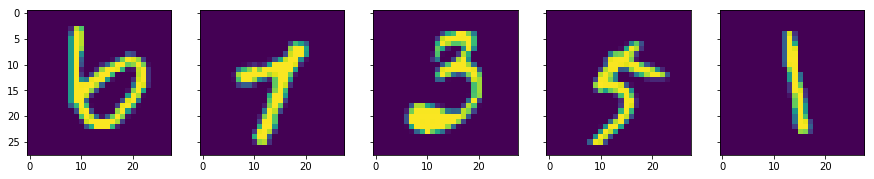

In [11]:
from random import randint
import random

def plot_image(X, seed=3241, kwargs_for_imshow={} ):
    random.seed( seed )
    n = X.shape[0]

    f, axes = plt.subplots(1, 5, sharey=True, figsize=(15,3))
    for i in range(5):
        axes[i].imshow( X[ randint(0,n-1) ].reshape( (28,28) ), **kwargs_for_imshow )
        
plot_image( mnist['data'] )

### b. Normaling features (or, scaling features, in SciKit parlance)

In [12]:
from sklearn.preprocessing import StandardScaler

mnist_scaled = mnist.copy()
mnist_scaled['data'] = mnist['data'].astype( np.float64 )

scaler = StandardScaler()
scaler.fit( mnist_scaled['data'] )
mnist_scaled['data'] = scaler.transform( mnist_scaled['data'] )

The same images as before, but now after they have been scaled

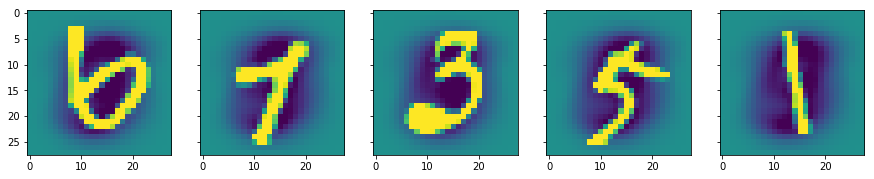

In [13]:
plot_image( mnist_scaled['data'], kwargs_for_imshow={'clim': (-1,1)} )

It's interesting to see a "black" region in the center of every image. This black region, in which all values are negative, indicates where most of information is located. Rarely (or maybe never) a number is drawn so that it touches/uses the outermost pixels, so there's not much information in there, but there is a lot of near the center of the image.

### c. Taking two classes and training a linear SVM on them. Selecting optimal C value for them.

In [14]:
def two_classes(dataset, target, class1, class2):
    index = (target == class1) | (target == class2)
    X = dataset[ index ]
    y = target[ index ]
    #y[ y==class1 ] = -1
    #y[ y==class2 ] = 1
    return X, y

X, y = two_classes( mnist_scaled['data'], mnist['target'], 1, 0 )

Some datapoints from the dataset of 1 and 0's

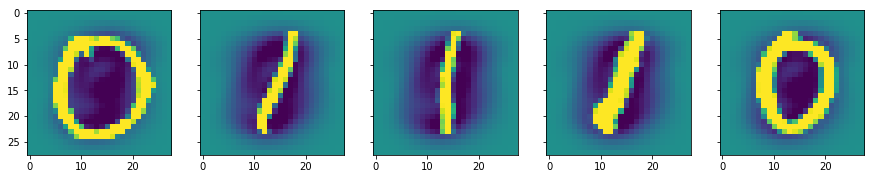

In [15]:
plot_image( X, kwargs_for_imshow={'clim': (-1,1)} )

In [16]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=5431)

Searching for the best C parameter between the values $\left\{2^{-15}, 2^{-14}, \dots, 2^{10}\right\}$

In [17]:
from sklearn.svm import LinearSVC

C_exp = list(range(-15, 11))
test_acc = []
train_acc = []

for i in range(len(C_exp)):
    #print( "2**{}".format(C_exp[i]), end="\t" )
    clf = LinearSVC(random_state=423, C=2**C_exp[i], loss='hinge')
    clf.fit( X_train, y_train )
    
    sct = clf.score(X_train, y_train)
    train_acc.append( sct )
    
    sc = clf.score(X_test, y_test)
    #print( sc )
    test_acc.append( sc )
    print("*", end="")
print()

**************************


And the plot of trying all possible combinations

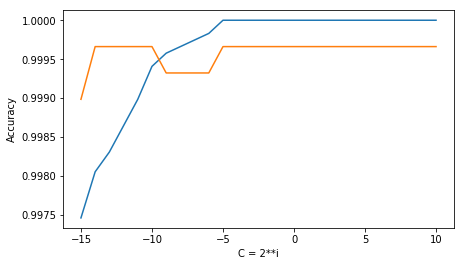

In [18]:
plt.figure(figsize=(7,4))

plt.xlabel("C = 2**i")
plt.ylabel("Accuracy")
plt.plot(C_exp, train_acc)
plt.plot(C_exp, test_acc)

plt.show()

The best value for C seems to be any value between $2^{-14}$ and $2^{10}$, there is where the testing accuracy (orange) is highest. Now, remember that the bigger the value of $C$ is the more will the model overfit. We don't want the model to overfit, therefore I select $2^{-10}$ as the optimal value for C.

### d and e. Extracting weights from classification and ploting them in the shape of the images ($28\times28$)

In [19]:
clf = LinearSVC(random_state=423, C=2**-10)
clf.fit( X_train, y_train )

LinearSVC(C=0.0009765625, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=423, tol=0.0001,
     verbose=0)

In [20]:
weights = clf.coef_

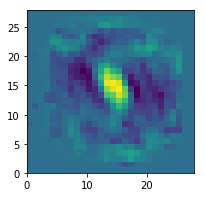

In [21]:
plt.figure( figsize=(3,3) )
plt.pcolor( weights.reshape( (28,28) ) )
plt.show()

Neat, the weights are telling us how much the image appears to be a 1 or a 0! An image is more a 1 if the majority of the black pixels pass throught the middle of the image, conversely the image is a 0 if the black pixels are around the center of the image but not in the center.

### f. Plots of varying the pairs and values of C

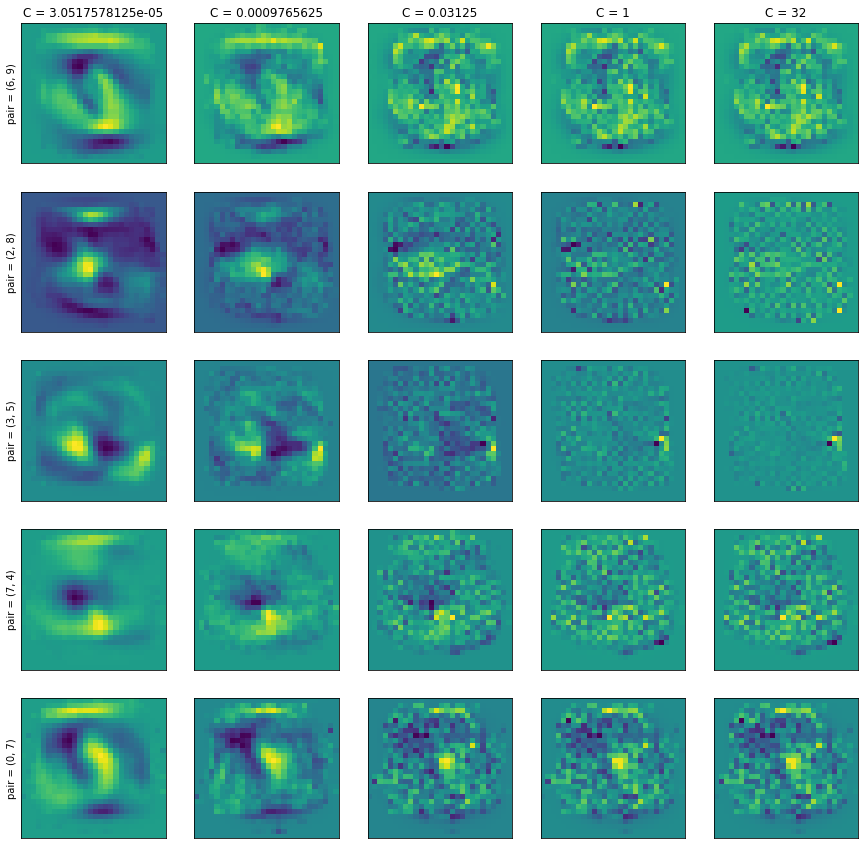

In [22]:
pairs = [(6,9), (2,8), (3,5), (7,4), (0, 7)]
Cs = [2**-15, 2**-10, 2**-5, 1, 2**5]

f, axes = plt.subplots(5, 5, sharey=True, figsize=(15,15))
i, j = (0,0)

for c1,c2 in pairs:
    X, y = two_classes( mnist_scaled['data'], mnist['target'], c1, c2 )
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=5431)

    for C in Cs:
        clf = LinearSVC(random_state=423, C=C, loss='hinge')
        clf.fit( X_train, y_train )
 
        # ploting result
        if i==0:
            axes[i][j].set_title("C = {}".format(C))
        if j==0:
            axes[i][j].set_ylabel("pair = ({}, {})".format(c1, c2))
        #axes[i][j].set_axis_off()
        axes[i][j].axes.get_xaxis().set_ticks([])
        axes[i][j].axes.get_yaxis().set_ticks([])
        axes[i][j].pcolor( clf.coef_.reshape( (28,28) ) )
        j+=1
    i, j = (i+1, 0)
    
plt.show()

The best images are those with very low values of C, ie, models with high regularization, less overfit.

Bright yellow indicates that any image with many pixels in that region should be of the first class, dark blue indicates how much those pixels contribute to the image to be classified as the second class.

The most interesting images are those in which the characteristics of the classes can be seen easily, for example, for (2,8) the image seems to contain an 8, why? Well, 2 and 8 seem to be two classes that overlap a lot (their images are similar) and it's therefore difficult to separate them. It seems that the best strategy to be able tell them apart involves trying to match the shapes of the images to the shape of 8 or not.

Other notable good looking images are:

- (3, 5): It seems that the top part of the 3 and 5 don't matter much on deciding to which class an image corresponds.
- (6,9) and (0,7): These two classifiers look similar, it seems as if the form of 7 and 9 cause the image to be shaped in a similar way, there seems to be in both classifiers the image of a 6, as if 6 was opossed to 7 and 9.

## 3. Playing with kernels for strings

### a. Getting datasets of common words

The dataset were obtained from the list of most frequent words from wiktionary: https://en.wiktionary.org/wiki/Wiktionary:Frequency_lists

The scripts used to get them were:

- English:

~~~bash
url="https://en.wiktionary.org/wiki/Wiktionary:Frequency_lists/PG/2006/04/1-10000"
curl ${url} | pup 'table > tbody > tr > :nth-child(2) text{}' > common_English.txt
~~~

- Spanish:

~~~bash
url="https://en.wiktionary.org/wiki/Wiktionary:Frequency_lists/Spanish"
curl ${url}1000 | pup '.wikitable > tbody > tr > :nth-child(2) text{}' > common_Spanish.txt
for i in {1..9}; do
  curl "${url}${i}001-$(( i+1 ))000" | pup '.wikitable > tbody > tr > :nth-child(2) text{}' >> common_Spanish.txt
done
~~~

Loading datasets into numpy

In [23]:
import unicodedata
import re
import numpy as np

def normalize_dataset(lang_set):
    # converting all accented words into ascii
    norm = [unicodedata.normalize('NFD', w.strip().lower()) # normalizing unicode characters
                       .encode('ASCII', 'ignore') # converting all accents into their closest ASCII equivalent
                       .decode('utf-8') # converting strings back to unicode
            for w in lang_set]
    # removing all words that are not words or shorter than 4 letters
    return [w for w in norm if re.match("[a-z]*\Z", w) and len(w) >= 4]

en = normalize_dataset( open('common_English.txt').readlines() )
es = normalize_dataset( open('common_Spanish.txt').readlines() )

In [24]:
# Creating dataset (and target)
dataset = np.array( en + es ).reshape( (-1, 1) )
target = np.array( [-1]*len(en) + [1]*len(es) )

In [25]:
from sklearn import model_selection

# train and testing datasets
X_train, X_test, y_train, y_test = model_selection.train_test_split(dataset, target, test_size=0.2, random_state=5431)

### b. Implementing SSK (Lodhi et al. (2002)) and dice's coefficient. Kernels for strings

#### SSK implementation

In [26]:
%load_ext Cython

The code below is an implementation of the Fast Substring Kernel (SSK) proposed by Lodhi et al. (2002) written in Cython. I took the code from an implementation I did some months back, you can find it in the following url:

https://github.com/helq/python-ssk

In [27]:
%%cython

# Cython code, make sure you have Cython installed ;)
import numpy as np
cimport numpy as np

from cpython cimport array
import array

cimport cython

def ssk(s, t, int n, float lbda, accum=False):
    """s and t are strings, either numpy.str_ or python str, or a list of chars"""
    s_array = array.array('l', [ord(c) for c in s])
    t_array = array.array('l', [ord(c) for c in t])
    return ssk_array(s_array, t_array, n, lbda, accum)

# Kernel defined by Lodhi et al. (2002)
@cython.boundscheck(False) # turn off bounds-checking for entire function
@cython.wraparound(False)  # turn off negative index wrapping for entire function
def ssk_array(array.array s_, array.array t_, int n, float lbda, accum=False):
    cdef int lens, lent
    cdef int i, sj, tk
    cdef float toret
    cdef long[:] s # this reduces the overhead 10x fold!!!
    cdef long[:] t

    s = s_ if s_.typecode == 'l' else array.array('l', [int(c) for c in s_])
    t = t_ if t_.typecode == 'l' else array.array('l', [int(c) for c in t_])

    lens, lent = len(s), len(t)
    #k_prim = (-1)*np.ones( (n+1, lens, lent) )
    cdef np.ndarray[np.float64_t, ndim=3] \
        k_prim = np.zeros( (n, lens, lent), dtype=np.float )

    k_prim[0,:,:] = 1

    for i in range(1,n):
        for sj in range(i,lens):
            toret = 0.
            for tk in range(i,lent):
                if s[sj-1]==t[tk-1]: # trick taken from shogun implemantion of SSK
                    toret = lbda * (toret + lbda*k_prim[i-1,sj-1,tk-1])
                else:
                    toret *= lbda
                k_prim[i,sj,tk] = toret + lbda * k_prim[i, sj-1, tk]

    cdef int start = 0 if accum else n-1
    cdef float k = 0.

    for i in range(n):
        for sj in range(i,lens):
            for tk in range(i,lent):
                if s[sj]==t[tk]:
                    k += lbda*lbda*k_prim[i,sj,tk]

    # print( [len(list(i for (sj,tk,i) in k_prim if i==m-1)) for m in range(n)] )
    return k

def string_kernel(xs, ys, n, lbda):
    """xs and ys are numpy arrays of strings or arrays of ints, n an integer and lbda a bool"""
    if len(xs.shape) != 2 or len(ys.shape) != 2 or xs.shape[1] != 1 or ys.shape[1] != 1:
        raise "The shape of the features is wrong, it must be (n,1)"

    cdef int lenxs, lenys
    cdef int i, j
    cdef np.ndarray[np.float64_t, ndim=2] mat, mat_xs, mat_ys
    lenxs, lenys = xs.shape[0], ys.shape[0]

    mat = np.zeros( (lenxs, lenys) )

    ssk_fun = ssk_array if xs.dtype == 'O' and isinstance(xs[0,0], array.array) else ssk

    # If both lists are equal, then the resulting matrix is symetric, there is no need to
    # calculate the hole thing
    if lenxs == lenys and np.array_equal(xs, ys):
        for i in range(lenxs):
            for j in range(i,lenys):
                mat[j,i] = mat[i,j] = ssk_fun(xs[i,0], ys[j,0], n, lbda, accum=True)

        mat_xs = mat_ys = mat.diagonal().reshape( (lenxs, 1) )

    else:
        for i in range(lenxs):
            for j in range(lenys):
                mat[i,j] = ssk_fun(xs[i,0], ys[j,0], n, lbda, accum=True)

        mat_xs = np.zeros( (lenxs, 1) )
        mat_ys = np.zeros( (lenys, 1) )

        for i in range(lenxs):
            mat_xs[i] = ssk_fun(xs[i,0], xs[i,0], n, lbda, accum=True)
        for j in range(lenys):
            mat_ys[j] = ssk_fun(ys[j,0], ys[j,0], n, lbda, accum=True)

    return np.divide(mat, np.sqrt(mat_ys.T * mat_xs))

In [28]:
def get_ssk_kernel_for_scikit(max_substring, lambda_decay):
    def strker(il,ir):
        #print("Shape of gramm matrix to create ({},{})".format(len(il), len(ir)))
        #l = np.array(il).reshape( (len(il), 1) )
        #r = np.array(ir).reshape( (len(ir), 1) )
        return string_kernel(il,ir, max_substring, lambda_decay)
    return strker

#### Dice's coefficient

The second kernel to use (or implement) is dice's coefficient. The formula to calculate dice's coefficient is:

$$dice(str1, str2, n) = \frac{ 2 \left| ngrams(str1) \cap ngrams(str2) \right| }{ \left| ngrams(str1) \right| + \left| ngrams(str2) \right| }$$

Which basically counts the number of common $n$-grams between two strings (notice how we need to set a $n$ for the size of $n$-grams, $n$ usually is 1 or 2 (for bigrams)). We normalize the coefficient by diving it on the total number of $n$-grams between both strings (and multiplying by two).

In [29]:
%%cython

cimport cython

@cython.boundscheck(False) # turn off bounds-checking for entire function
@cython.wraparound(False)  # turn off negative index wrapping for entire function
cdef set ngrams(str_, int n):
    return set( str_[i:i+n] for i in range(len(str_)-n+1) )

@cython.boundscheck(False)
@cython.wraparound(False)
def dice_kernel(str1, str2, int n):
    cdef int lenstr1 = len(str1)
    cdef int lenstr2 = len(str2)
    # Simple cases, where dice's coefficient should be zero
    if    lenstr1==0 or lenstr2==0 \
       or lenstr1<n  or lenstr2<n:
        return 0.0

    cdef set str1_ngrams = ngrams(str1, n)
    cdef set str2_ngrams = ngrams(str2, n)
    
    return 2 * len(str1_ngrams & str2_ngrams) / (len(str1_ngrams) + len(str2_ngrams))

In [30]:
def get_dice_kernel_mat_for_scikit(n_gram):
    def dicekermat(il,ir):
        #print("Shape of gramm matrix to create ({},{})".format(len(il), len(ir)))
        mat = np.zeros( (len(il), len(ir)) )
        
        if il.shape==ir.shape and (il==ir).all():
            for i in range(len(il)):
                for j in range(i, len(ir)):
                    tmp = dice_kernel(il[i,0], ir[j,0], n_gram)
                    mat[j,i] = mat[i,j] = tmp
            return mat
        else:
            for i in range(len(il)):
                for j in range(len(ir)):
                    tmp = dice_kernel(il[i,0], ir[j,0], n_gram)
                    mat[i,j] = tmp
            return mat
    return dicekermat

#get_dice_kernel_mat_for_scikit(1)(X_train[:10], X_train[:10])

### c. Traning SVM with kernels (search of best parameter)

In [31]:
from sklearn.svm import SVC
from os import path

To find the best parameters for a SVM we need to search the space of (hyper-)parameters. We are going to perform a grid search varying the values of C (svm parameter), $\lambda$ (the parameter for SSK), and $n$ ($n$-gram parameter).

The process involves computing many times the same kernel matrices, therefore we first compute (and save) all kernel matrices we will need for the search.

In [32]:
from multiprocessing import Pool

def calculate_ssk_kernel_n_save(params):
    lmda, name, m1, m2 = params
    name = "grams/gram_{}_lmda:{}.npy".format(name, lmda)
    if path.isfile(name):
        print( "Skipping: {}".format(name) )
        return
    print( "Calculating gram matrix: {}".format(name) )
    max_substring = 10
    my_ssk_kernel = get_ssk_kernel_for_scikit(max_substring, lmda)
    gram = my_ssk_kernel(m1, m2)
    np.save(name, gram)
    
to_process  = [(lmda, "ssk_train", X_train, X_train) for lmda in [.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0]]
to_process += [(lmda, "ssk_test", X_test, X_train) for lmda in [.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0]]
pool = Pool(processes=2)
pool.map( calculate_ssk_kernel_n_save, to_process )

def calculate_ngram_kernel_n_save(params):
    ngram, name, m1, m2 = params
    name = "grams/gram_{}_ngram:{}.npy".format(name, ngram)
    if path.isfile(name):
        print( "Skipping: {}".format(name) )
        return
    print( "Calculating gram matrix: {}".format(name) )
    my_ssk_kernel = get_dice_kernel_mat_for_scikit(ngram)
    gram = my_ssk_kernel(m1, m2)
    np.save(name, gram)
    
to_process  = [(ngram, "ngram_train", X_train, X_train) for ngram in [1,2,3,4,5]]
to_process += [(ngram, "ngram_test", X_test, X_train) for ngram in [1,2,3,4,5]]
pool = Pool(processes=2)
pool.map( calculate_ngram_kernel_n_save, to_process )

del pool

Skipping: grams/gram_ssk_train_lmda:0.1.npy
Skipping: grams/gram_ssk_train_lmda:0.2.npy
Skipping: grams/gram_ssk_train_lmda:0.3.npy
Skipping: grams/gram_ssk_train_lmda:0.4.npy
Skipping: grams/gram_ssk_train_lmda:0.7.npy
Skipping: grams/gram_ssk_train_lmda:0.5.npy
Skipping: grams/gram_ssk_train_lmda:0.8.npy
Skipping: grams/gram_ssk_train_lmda:0.6.npy
Skipping: grams/gram_ssk_train_lmda:0.9.npy
Skipping: grams/gram_ssk_train_lmda:1.0.npy
Skipping: grams/gram_ssk_test_lmda:0.3.npy
Skipping: grams/gram_ssk_test_lmda:0.4.npy
Skipping: grams/gram_ssk_test_lmda:0.1.npy
Skipping: grams/gram_ssk_test_lmda:0.5.npy
Skipping: grams/gram_ssk_test_lmda:0.2.npy
Skipping: grams/gram_ssk_test_lmda:0.6.npy
Skipping: grams/gram_ssk_test_lmda:0.7.npy
Skipping: grams/gram_ssk_test_lmda:0.8.npy
Skipping: grams/gram_ssk_test_lmda:0.9.npy
Skipping: grams/gram_ssk_test_lmda:1.0.npy
Skipping: grams/gram_ngram_train_ngram:3.npy
Skipping: grams/gram_ngram_train_ngram:1.npy
Skipping: grams/gram_ngram_train_ngram:4

The total size of all calculated matrices is around 33GiB. The major problem with SVMs is, as you can see, the sizes of matrices, they get very big with little data.

Next, we search the space for the best parameters. To be sure that the values we get are not a fluke dependent of our parameters, we use k-fold cross validation.

A 5-fold cross validation seems to be our best bet. We defined before a size of 20% for our test set, and a 5-fold cross validation would give us a 16% (of the original data set size) validation set size, which is close to 20% and therefore it could give us a good approximation for the validation accuracy.

In [33]:
from sklearn.model_selection import cross_validate
import pickle

In [34]:
Cs = list(range(-15,11))
all_scores = {}

processed  = [(lmda, "ssk_train", "lmda") for lmda in [.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0]]
processed += [(ngram, "ngram_train", "ngram") for ngram in [1,2,3,4,5]]

# Loading precomputed crossvalidation scores
path_to_all_scores = "svm_search.pickle"
if path.isfile(path_to_all_scores):
    with open(path_to_all_scores, 'rb') as f:
        all_scores = pickle.load( f )

In [36]:
for param, name_, param_name in processed:
    name = "grams/gram_{}_{}:{}.npy".format(name_, param_name, param)
    gram = np.load(name)
    print( "Precomputed Kernel loaded: {}".format(name) )
    
    for C in Cs:
        # Compute k-fold crossvalidation varying C
        if (C, name_, param) not in all_scores:
            clf = SVC(kernel='precomputed', C=2**C, random_state=7654)
            scores = cross_validate(clf, gram, y_train, scoring=['accuracy'], return_train_score=True, cv=5, n_jobs=2)

            clf.fit( gram, y_train )

            scores["n_support"] = clf.support_.shape[0]
            all_scores[(C, name_, param)] = scores
            
        # Skip whatever has been already computed
        else:
            scores = all_scores[(C, name_, param)]
        
        print("C=2**{}\t(k-fold cross) accuracy. Train: {:.5g} (+/- {:.5g})\tTest: {:.5g} (+/- {:.5g})\tNum support: {:d}"
              .format(C,
                      scores["train_accuracy"].mean(),
                      scores["train_accuracy"].std() * 2,
                      scores["test_accuracy"].mean(),
                      scores["test_accuracy"].std() * 2,
                      scores["n_support"]))

    del gram

Precomputed Kernel loaded: grams/gram_ssk_train_lmda:0.1.npy
C=2**-15	(k-fold cross) accuracy. Train: 0.50953 (+/- 3.975e-05)	Test: 0.50953 (+/- 0.00015899)	Num support: 15022
C=2**-14	(k-fold cross) accuracy. Train: 0.50953 (+/- 3.975e-05)	Test: 0.50953 (+/- 0.00015899)	Num support: 15022
C=2**-13	(k-fold cross) accuracy. Train: 0.50953 (+/- 3.975e-05)	Test: 0.50953 (+/- 0.00015899)	Num support: 15022
C=2**-12	(k-fold cross) accuracy. Train: 0.50953 (+/- 3.975e-05)	Test: 0.50953 (+/- 0.00015899)	Num support: 15022
C=2**-11	(k-fold cross) accuracy. Train: 0.50953 (+/- 3.975e-05)	Test: 0.50953 (+/- 0.00015899)	Num support: 15022
C=2**-10	(k-fold cross) accuracy. Train: 0.50953 (+/- 3.975e-05)	Test: 0.50953 (+/- 0.00015899)	Num support: 15022
C=2**-9	(k-fold cross) accuracy. Train: 0.66238 (+/- 0.0015852)	Test: 0.66005 (+/- 0.0073062)	Num support: 14892
C=2**-8	(k-fold cross) accuracy. Train: 0.68901 (+/- 0.0032759)	Test: 0.68682 (+/- 0.012833)	Num support: 13879
C=2**-7	(k-fold cross) a

In [37]:
# Saving precomputed crossvalidation scores
with open(path_to_all_scores, 'wb') as f:
    pickle.dump( all_scores, f )

Yeah, finally (after 20 hrs of computer work and a lot of memory used) we get the results of our grid search. This is how they look.

In [38]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def plot_crossvalidation(params, Cs, param_name, Cs_name, Z_test, Z_train, zlims=(.5, 1.)):
    vmin, vmax = zlims
    
    if Z_train is not None:
        fig = plt.figure(figsize=(15,6))
        ax1 = fig.add_subplot(121, projection='3d')
        ax2 = fig.add_subplot(122, projection='3d')
    else:
        fig = plt.figure(figsize=(7.5,6))
        ax1 = fig.add_subplot(111, projection='3d')

    # Make data.
    X, Y = np.meshgrid(params, np.array( Cs ))

    # Plot the surface.
    surf1 = ax1.plot_surface(X, Y, Z_test, cmap=cm.coolwarm, linewidth=0, antialiased=False, vmin=vmin, vmax=vmax)
    ax1.set_title("Training set")
    ax1.set_xlabel(param_name)
    ax1.set_ylabel(Cs_name)
    ax1.set_zlim(vmin, vmax)

    if Z_train is not None:
        surf2 = ax2.plot_surface(X, Y, Z_train, cmap=cm.coolwarm, linewidth=0, antialiased=False, vmin=vmin, vmax=vmax)
        ax2.set_title("Validation set")
        ax2.set_xlabel(param_name)
        ax2.set_ylabel(Cs_name)
        ax2.set_zlim(vmin, vmax)

    # Add a color bar which maps values to colors.
    #fig.colorbar(surf1, shrink=0.5, aspect=5)

    plt.show()

In [39]:
def max_accuracy_params(Z, name, params, Cs, param_name):
    imax = Z.argmax()
    index = (imax//Z.shape[1], imax%Z.shape[1])
    print("The highest accuracy in {}\t{:.5g}\twith C=2**{} and {}={} ".format(
          name,    Z[index],    Cs[index[0]],    param_name,   params[index[1]] ))

**SSK grid search plot** (using 5-fold cross validation)

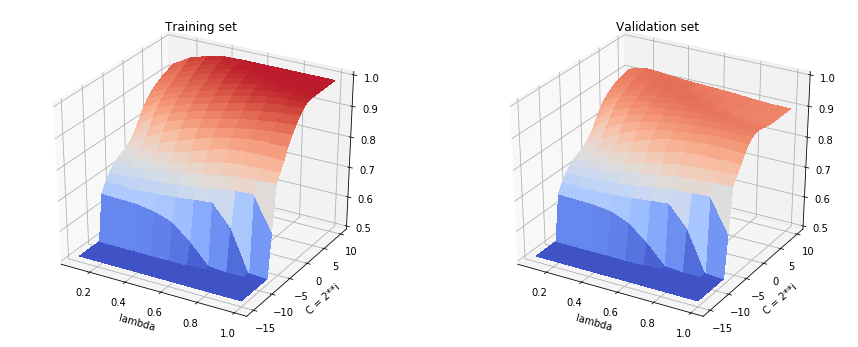

In [40]:
params = np.array( [.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0] )
Z_test = np.array([[all_scores[(C, 'ssk_train', lmda)]['train_accuracy'].mean() for lmda in params] for C in Cs])
Z_train = np.array([[all_scores[(C, 'ssk_train', lmda)]['test_accuracy'].mean() for lmda in params] for C in Cs])

plot_crossvalidation(params, Cs, "lambda", "C = 2**i", Z_test, Z_train)

Number of support vectors for each parameter (notice that the axes x and y have been swapped)

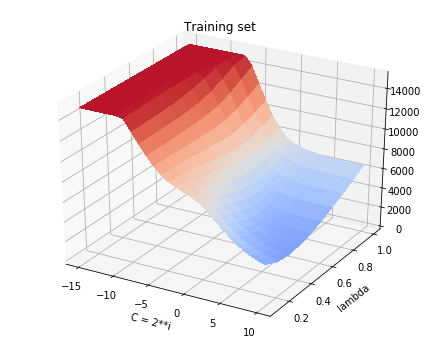

In [41]:
Z_n_support = np.array([[all_scores[(C, 'ssk_train', lmda)]['n_support'] for C in Cs] for lmda in params])

plot_crossvalidation(Cs, params, "C = 2**i", "lambda", Z_n_support, None, (0, X_train.shape[0]))

In [42]:
max_accuracy_params(Z_test, "training", params, Cs, "lambda")
max_accuracy_params(Z_train, "validation", params, Cs, "lambda")

The highest accuracy in training	0.98864	with C=2**5 and lambda=0.9 
The highest accuracy in validation	0.9251	with C=2**5 and lambda=0.5 


So, the best paramater values for SSK using SVMs seem to be:

- $C = 2^5$
- $\lambda = 0.5$

Notice how the number of support vectors is very low for these (selected) parameters, which is neat, we don't need all datapoints to be able to classify the data. :D

**Dice's coefficient grid search plot** (using 5-fold cross validation)

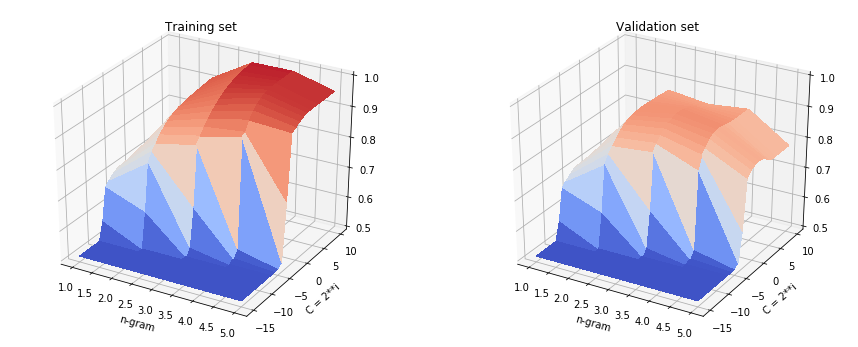

In [43]:
params = np.array( [1,2,3,4,5] )
Z_test = np.array([[all_scores[(C, 'ngram_train', ngram)]['train_accuracy'].mean() for ngram in params] for C in Cs])
Z_train = np.array([[all_scores[(C, 'ngram_train', ngram)]['test_accuracy'].mean() for ngram in params] for C in Cs])

plot_crossvalidation(params, Cs, "n-gram", "C = 2**i", Z_test, Z_train)

The graphic of the number of support vectors behaves similar to the same graphic for the SSK, which is quite interesting, it seems, as if the number of support vectors is related to how well does the SVM learns the data (actually, this is true, take a look at Nu-SVMs)

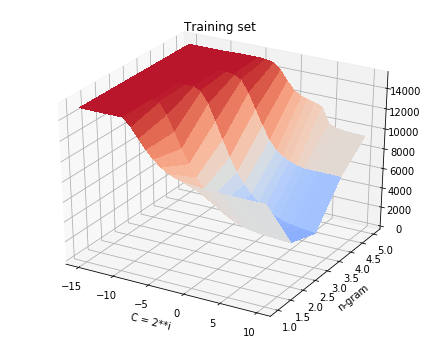

In [44]:
Z_n_support = np.array([[all_scores[(C, 'ngram_train', lmda)]['n_support'] for C in Cs] for lmda in params])

plot_crossvalidation(Cs, params, "C = 2**i", "n-gram", Z_n_support, None, (0, X_train.shape[0]))

In [45]:
max_accuracy_params(Z_test, "training", params, Cs, "n-gram")
max_accuracy_params(Z_train, "validation", params, Cs, "n-gram")

The highest accuracy in training	0.98864	with C=2**8 and n-gram=4 
The highest accuracy in validation	0.89598	with C=2**2 and n-gram=3 


So, the best paramater values for dice's coefficient using SVMs seem to be:

- $C = 2^2$
- $n = 3$

The SSK is a more complex kernel than dice's coefficient and seems to be better suited for this problem. Next, let's try playing with the models we got.

#### d. Evaluating performance of selected models

**i.** Testing accuracy for both models:

In [46]:
from sklearn.externals import joblib

def test_validation_and_return_model(name_mdl, name_test, C):
    filename_mdl = "model_{}.joblib".format( name_mdl )
    if path.isfile(filename_mdl):
        clf = joblib.load(filename_mdl)
    else:
        name = "grams/{}.npy".format( name_mdl )
        gram = np.load(name)

        clf = SVC(kernel='precomputed', C=C, random_state=7654)
        clf.fit( gram, y_train )
        del gram
    
        joblib.dump(clf, filename_mdl)
    
    gram_test = np.load(name_test)
    test_accuracy = clf.score( gram_test, y_test )
    prediction_test = clf.predict( gram_test )
    
    return (test_accuracy, prediction_test, clf)

In [49]:
name = "gram_ssk_train_lmda:0.5"
name_test = "grams/gram_ssk_test_lmda:0.5.npy"
(ssk_test_validation, prediction_test_ssk, clf_ssk) = test_validation_and_return_model( name, name_test, 2**5 )

In [48]:
name = "gram_ngram_train_ngram:3"
name_test = "grams/gram_ngram_test_ngram:3.npy"
(ngram_test_validation, prediction_test_ngram, clf_ngram) = test_validation_and_return_model( name, name_test, 2**2 )

In [50]:
from IPython.display import HTML, display

data = [["<b>Parameter</b>" ,"<b>Value</b>", "<b>C</b>", "<b>Test validation</b>"],
        ["alpha (SSK)", .5, 2**5, "{:.5g}%".format(ssk_test_validation * 100)],
        ["n (n-gram)",  3, 2**2, "{:.5g}%".format(ngram_test_validation * 100)]]

display(HTML(
'<table><tr>{}</tr></table>'.format(
    '</tr><tr>'.join(
        '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
    )
))

Parameter,Value,C,Test validation
alpha (SSK),0.5,32,93.105%
n (n-gram),3,4,90.703%


Neat, SSK is really better in this problem than dice's coefficient.

**ii and iii.** Analysing mistakes of the classifier

**SVM with SSK**

In [51]:
failing_ssk = (prediction_test_ssk != y_test)
failing_ssk_es = failing_ssk & (y_test == 1)
failing_ssk_en = failing_ssk & (y_test == -1)

These are the words that the classifier fails with in Spanish

In [52]:
print( X_test[ failing_ssk_es ].T )

[['sone' 'coctel' 'version' 'junior' 'victimas' 'blues' 'sirve'
  'exhausto' 'satisfacer' 'insensible' 'probable' 'word' 'civil' 'valor'
  'androide' 'vulgar' 'guarde' 'sepan' 'volved' 'whisky' 'harian' 'jure'
  'admite' 'nevera' 'signifique' 'genial' 'natal' 'mortal' 'piel'
  'barril' 'natural' 'rehen' 'burdel' 'lote' 'division' 'chicle' 'nieve'
  'chaval' 'chocolate' 'fatal' 'avion' 'claves' 'honor' 'editor'
  'invencible' 'franceses' 'nene' 'simple' 'inspector' 'normal'
  'posesion' 'industrial' 'mates' 'victimas' 'avion' 'comics' 'incluye'
  'reves' 'anormal' 'lider' 'winchester' 'tope' 'sake' 'carne' 'placer'
  'dices' 'salmon' 'club' 'violin' 'virtud' 'admirable' 'futbol' 'grites'
  'joven' 'plan' 'inicial' 'fragil' 'humor' 'nobles' 'desfile' 'rinon'
  'futbol' 'excursion' 'moises' 'autor' 'leal' 'besame' 'confies' 'sean'
  'creed' 'sonrie' 'pintor' 'animal' 'ensename' 'valium' 'pies' 'surf'
  'aventon' 'alli' 'aires' 'carcel' 'persigue' 'universal' 'victima'
  'cheques' 'clave' 

Ok, it's easy to see why some words are difficult for the classifier to guess to which language they correspond, specially those which are in both languages, like: autor, animal, normal, honor, and version.

Other words are actually not spanish, the major example is the word "word"! How is that word between the first 10000 common words in Spanish. Well, after looking at the database, I made a grave mistake of not removing it when using the scrapping script (:S).

Other mistakes seem to be simply because the words look very similar to English words like: ensename (enseñame, similar to name), acceder (access), guarde (guard), androide (android), posesion (possesion), and incluye (include).

In [53]:
print( X_test[ failing_ssk_en ].T )

[['rebecca' 'bases' 'question' 'detective' 'suite' 'complete' 'error'
  'logs' 'bite' 'martha' 'center' 'experimental' 'robe' 'salad' 'marquis'
  'metal' 'potatoes' 'velvet' 'oxen' 'pistol' 'entire' 'usual' 'reporter'
  'supreme' 'invasion' 'steel' 'cries' 'dare' 'vegetables' 'perfume'
  'pierre' 'idol' 'hero' 'mental' 'oscar' 'extremes' 'care' 'soda'
  'dragon' 'alexandria' 'lucia' 'revolver' 'tale' 'queer' 'precise'
  'basil' 'rendezvous' 'continual' 'bavaria' 'hotel' 'cigar' 'suicide'
  'dora' 'ideas' 'eleven' 'telegram' 'acres' 'casual' 'patron' 'favor'
  'vinegar' 'ardor' 'sombre' 'time' 'minute' 'miles' 'cicero' 'major'
  'canal' 'mile' 'retire' 'soften' 'angela' 'chaos' 'popular' 'stare'
  'detestable' 'parma' 'plea' 'cargo' 'level' 'profane' 'iron' 'decision'
  'horrible' 'ohio' 'venetian' 'spare' 'tales' 'lame' 'celestial' 'tense'
  'labor' 'dares' 'envoy' 'vile' 'cecilia' 'peculiar' 'predecessor'
  'disposal' 'peas' 'sugar' 'omen' 'vigor' 'fees' 'episode'
  'correspondence' '

Similar to the mistakes made by the classifier with Spanish words, many of the wrong words are in both languages like: cargo, canal, martha, peru, federal, gradual and favor.

Other words are very similar to some Spanish words like: continual (continuo), reconcile (reconciliar), cigar (cigarro), reporter (reportar), and sombre (sombra).

**SVM with dice's coefficient**

In [54]:
failing_ngram = (prediction_test_ngram != y_test)
failing_ngram_es = failing_ngram & (y_test == 1)
failing_ngram_en = failing_ngram & (y_test == -1)

In [55]:
print( X_test[ failing_ngram_es ].T )

[['rebeldes' 'ustedes' 'sone' 'coctel' 'jugue' 'huir' 'refugio' 'version'
  'junior' 'jazz' 'cancha' 'blues' 'sirve' 'exhausto' 'bomba'
  'insensible' 'probable' 'admiro' 'probablemente' 'word' 'princesa'
  'civil' 'androide' 'limite' 'mireme' 'capa' 'volved' 'jabon' 'encender'
  'whisky' 'harian' 'holanda' 'jure' 'clementina' 'roble' 'admite'
  'nevera' 'signifique' 'genial' 'natal' 'creen' 'bahia' 'intenten'
  'basta' 'intentes' 'piel' 'barril' 'lineas' 'natural' 'definicion'
  'mapa' 'rehen' 'gallina' 'burdel' 'estais' 'lote' 'chicle' 'nieve'
  'chaval' 'surgio' 'grupo' 'fatal' 'fase' 'universo' 'microfono'
  'garantizo' 'claves' 'celda' 'baloncesto' 'honor' 'nacen' 'franceses'
  'afganistan' 'simple' 'iris' 'inspector' 'normal' 'ancho' 'posesion'
  'bravo' 'industrial' 'estais' 'mates' 'termine' 'horrible' 'dicen'
  'empleos' 'manchas' 'comics' 'reves' 'lider' 'irresponsable'
  'winchester' 'tope' 'filete' 'jade' 'extraterrestre' 'hola' 'sake'
  'revise' 'carne' 'llueve' 'dices' 's

In [56]:
print( X_test[ failing_ngram_en ].T )

[['bases' 'crisp' 'clare' 'random' 'complete' 'error' 'center' 'tomb'
  'undergo' 'ellen' 'fear' 'dispense' 'robe' 'bolt' 'salad' 'marquis'
  'metal' 'potatoes' 'pistol' 'entire' 'usual' 'reporter' 'supreme'
  'smiles' 'continue' 'condemn' 'dare' 'monarchy' 'vegetables' 'scandal'
  'plaster' 'perfume' 'arabic' 'pierre' 'embraces' 'idol' 'drag' 'hero'
  'beset' 'bird' 'mental' 'hypocrisy' 'judah' 'scales' 'special' 'oscar'
  'damascus' 'delirium' 'soda' 'feudal' 'pipe' 'dragon' 'alexandria'
  'lucia' 'revolver' 'hypertext' 'demand' 'arabian' 'attire' 'queer'
  'precise' 'basil' 'continual' 'bestow' 'bavaria' 'hotel' 'suicide'
  'dora' 'ideas' 'quest' 'eleven' 'telegram' 'acres' 'casual' 'renown'
  'chairman' 'douglas' 'patron' 'lydia' 'favor' 'daisy' 'smote' 'creep'
  'ardor' 'sombre' 'elbow' 'indispensable' 'placid' 'glare' 'temples'
  'miles' 'discord' 'cicero' 'post' 'canal' 'retire' 'beseech' 'siege'
  'amiss' 'correspond' 'rhetoric' 'tune' 'angela' 'fantastic' 'chaos'
  'popular' '

We could argue similarly about how the second classifier (the one that uses the dice's kernel) makes the same mistakes as the first classifier, but that isn't completely true. This classifiert seems to get a "lot" more wrong, mainly because it doesn't take into account the relationship of distinct parts of words, just the neiboring areas. Some 3-grams are more frequent in Spanish that in English, but may be present in both, like: "las" which is quite common in Spanish which appears on words like "lastima", "clases", or "estrellas" (with 64 representatives in the dataset), but not so often in English "class", or "glass" (with 30 representatives in the dataset).

And just for fun, lets see how good the SSK classifier classifies some madeup, English looking, words:

In [57]:
words_ = ["irregardless", "supposably", "flustrated", "conversate", "sherbert", "humpfing", "columbusing"]
words = np.array([[w] for w in words_]).astype('<U18')

gram_ssk = get_ssk_kernel_for_scikit(10, .5)(words, X_train)
gram_ngram = get_dice_kernel_mat_for_scikit(3)(words, X_train)

print( clf_ssk.predict(gram_ssk) )
print( clf_ngram.predict(gram_ngram) )

[-1 -1 -1 -1 -1 -1 -1]
[-1 -1 -1 -1 -1 -1 -1]


Wow, both classifiers are pretty good with english words, bravo.

In [58]:
words_ = ["trutar", "camer", "entruvistar", "chequar", "asquicioso", "requilar", "tarantela"]
words = np.array([[w] for w in words_]).astype('<U18')

gram_ssk = get_ssk_kernel_for_scikit(10, .5)(words, X_train)
gram_ngram = get_dice_kernel_mat_for_scikit(3)(words, X_train)

print( clf_ssk.predict(gram_ssk) )
print( clf_ngram.predict(gram_ngram) )

[ 1 -1  1 -1  1 -1  1]
[ 1 -1  1 -1  1  1  1]


Well, I guess is harder for this kernels to notice that words ending in vowel+"r" are usually spanish words. A specially handcrafted kernel could be written to take into account this kind of information that may be common knoledge for many people.